<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1">Preprocessing</a></span><ul class="toc-item"><li><span><a href="#sample-10k-tweets" data-toc-modified-id="sample-10k-tweets-1.1">sample 10k tweets</a></span></li><li><span><a href="#get-tweet-length" data-toc-modified-id="get-tweet-length-1.2">get tweet length</a></span></li><li><span><a href="#remove-url,-emojis,-stop-words-and--lower-case-tweets" data-toc-modified-id="remove-url,-emojis,-stop-words-and--lower-case-tweets-1.3">remove url, emojis, stop words and  lower case tweets</a></span></li><li><span><a href="#get-polarity-and-subjectivity" data-toc-modified-id="get-polarity-and-subjectivity-1.4">get polarity and subjectivity</a></span></li></ul></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2">Analysis</a></span><ul class="toc-item"><li><span><a href="#Less-than-3%-tweets-were-toxic" data-toc-modified-id="Less-than-3%-tweets-were-toxic-2.1">Less than 3% tweets were toxic</a></span></li><li><span><a href="#balanced-sample-tweets-5k-toxic,-5k-non-toxic" data-toc-modified-id="balanced-sample-tweets-5k-toxic,-5k-non-toxic-2.2">balanced sample tweets 5k toxic, 5k non toxic</a></span></li><li><span><a href="#Correlation-heatmap" data-toc-modified-id="Correlation-heatmap-2.3">Correlation heatmap</a></span></li><li><span><a href="#Distribution-of-polarity-for-toxic-tweets-and-non-toxic-tweets" data-toc-modified-id="Distribution-of-polarity-for-toxic-tweets-and-non-toxic-tweets-2.4">Distribution of polarity for toxic tweets and non toxic tweets</a></span></li><li><span><a href="#Distribution-of-subjectivity-for-toxic-tweets-and-non-toxic-tweets" data-toc-modified-id="Distribution-of-subjectivity-for-toxic-tweets-and-non-toxic-tweets-2.5">Distribution of subjectivity for toxic tweets and non toxic tweets</a></span></li><li><span><a href="#Distribution-of-number-of-followers-for-toxic-tweets-and-non-toxic-tweets" data-toc-modified-id="Distribution-of-number-of-followers-for-toxic-tweets-and-non-toxic-tweets-2.6">Distribution of number of followers for toxic tweets and non toxic tweets</a></span></li><li><span><a href="#Distribution-of-number-of-followers-for-toxic-tweets-and-non-toxic-tweets" data-toc-modified-id="Distribution-of-number-of-followers-for-toxic-tweets-and-non-toxic-tweets-2.7">Distribution of number of followers for toxic tweets and non toxic tweets</a></span></li><li><span><a href="#Distribution-of-text-length-for-toxic-comments-and-non-toxic-comments" data-toc-modified-id="Distribution-of-text-length-for-toxic-comments-and-non-toxic-comments-2.8">Distribution of text length for toxic comments and non toxic comments</a></span></li><li><span><a href="#Distribution-of-friends-count-for-toxic-tweets-and-non-toxic-tweets" data-toc-modified-id="Distribution-of-friends-count-for-toxic-tweets-and-non-toxic-tweets-2.9">Distribution of friends count for toxic tweets and non toxic tweets</a></span></li><li><span><a href="#Distribution-of-favourites-count-for-toxic-tweets-and-non-toxic-tweets" data-toc-modified-id="Distribution-of-favourites-count-for-toxic-tweets-and-non-toxic-tweets-2.10">Distribution of favourites count for toxic tweets and non toxic tweets</a></span></li><li><span><a href="#World-Cloud-of-Top-100-toxic-Tweets" data-toc-modified-id="World-Cloud-of-Top-100-toxic-Tweets-2.11">World Cloud of Top 100 toxic Tweets</a></span></li><li><span><a href="#Top-10-tweets-with-highest-toxicity-score" data-toc-modified-id="Top-10-tweets-with-highest-toxicity-score-2.12">Top 10 tweets with highest toxicity score</a></span></li><li><span><a href="#Top-10-tweets-with-highest-toxicity-score" data-toc-modified-id="Top-10-tweets-with-highest-toxicity-score-2.13">Top 10 tweets with highest toxicity score</a></span></li><li><span><a href="#Top-words-from-tf-idf-(PUT-INTO-REPORT-AS-A-TABLE)" data-toc-modified-id="Top-words-from-tf-idf-(PUT-INTO-REPORT-AS-A-TABLE)-2.14">Top words from tf-idf (PUT INTO REPORT AS A TABLE)</a></span></li><li><span><a href="#Bigram" data-toc-modified-id="Bigram-2.15">Bigram</a></span></li><li><span><a href="#Tri-gram-and-Teragram-relates-to-keyword-gay" data-toc-modified-id="Tri-gram-and-Teragram-relates-to-keyword-gay-2.16">Tri gram and Teragram relates to keyword gay</a></span></li></ul></li></ul></div>

In [3]:
from textblob import TextBlob
import random
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Preprocessing

### sample 10k tweets

In [4]:
# read csv and drop nas
tweets_df = pd.read_csv("covid19_tweets.csv")
tweets_df = tweets_df.dropna(axis = 0, how = "any")

In [5]:
tweets_df['toxic_binary'] = tweets_df.toxicity >= 0.5
tweets_df['toxic_binary'] = tweets_df['toxic_binary'].astype(int)

In [18]:
# Randomly select 10k tweets 
non_toxic_sample = tweets_df[tweets_df.toxic_binary == 0].sample(n=5000, replace = False, random_state=236)
toxic_sample = tweets_df[tweets_df.toxic_binary == 1].sample(n=5000, replace = False, random_state=236)

In [19]:
sample_tweets = pd.concat([non_toxic_sample, toxic_sample])
sample_tweets.head()

,text,verified,favourites_count,retweet_count,followers_count,friends_count,toxicity,toxic_binary
2484992,President Marie Brown (right) delivered 2 boxe...,False,2.0,0.0,9.0,10.0,0.004075,0
535000,I miss painting my faaaaaace 😭 #COVID19 #Isola...,False,3942.0,0.0,294.0,187.0,0.038686,0
4525588,Thank you Raising Cane's for providing food fo...,False,437.0,1.0,1661.0,1983.0,0.005548,0
6199352,The relationship between how #COVID19 and refu...,True,2878.0,14.0,23235.0,2279.0,0.006465,0
3061284,Our #IL06 Town Hall tonite hosts physicians fr...,False,3127.0,0.0,1794.0,377.0,0.001858,0


### get tweet length

In [20]:
# get comment length
sample_tweets.insert(2, 'text_len', sample_tweets.text.str.split().str.len())
sample_tweets.head()

,text,verified,text_len,favourites_count,retweet_count,followers_count,friends_count,toxicity,toxic_binary
2484992,President Marie Brown (right) delivered 2 boxe...,False,38,2.0,0.0,9.0,10.0,0.004075,0
535000,I miss painting my faaaaaace 😭 #COVID19 #Isola...,False,10,3942.0,0.0,294.0,187.0,0.038686,0
4525588,Thank you Raising Cane's for providing food fo...,False,14,437.0,1.0,1661.0,1983.0,0.005548,0
6199352,The relationship between how #COVID19 and refu...,True,25,2878.0,14.0,23235.0,2279.0,0.006465,0
3061284,Our #IL06 Town Hall tonite hosts physicians fr...,False,44,3127.0,0.0,1794.0,377.0,0.001858,0


### remove url, emojis, stop words and  lower case tweets

In [21]:
import preprocessor as p
import nltk
from nltk.corpus import stopwords
# need to lowercase words
# remove stop words
# remove urls, emojis 
def clean_tweets(text):
    # remove emoji and urls
    p.set_options(p.OPT.URL, p.OPT.EMOJI)
    cleaned = p.clean(text)
    # lower case tweets
    words_in_tweet = cleaned.lower().split()
    stop_words = set(stopwords.words('english'))
    cleaned = [word for word in words_in_tweet if word not in stop_words]
    return " ".join(cleaned)

In [22]:
sample_tweets['text'] = sample_tweets.text.apply(clean_tweets)
sample_tweets.head()

,text,verified,text_len,favourites_count,retweet_count,followers_count,friends_count,toxicity,toxic_binary
2484992,president marie brown (right) delivered 2 boxe...,False,38,2.0,0.0,9.0,10.0,0.004075,0
535000,miss painting faaaaaace #covid19 #isolation #c...,False,10,3942.0,0.0,294.0,187.0,0.038686,0
4525588,thank raising cane's providing food evs team! ...,False,14,437.0,1.0,1661.0,1983.0,0.005548,0
6199352,relationship #covid19 refugees/immigration swe...,True,25,2878.0,14.0,23235.0,2279.0,0.006465,0
3061284,#il06 town hall tonite hosts physicians two ke...,False,44,3127.0,0.0,1794.0,377.0,0.001858,0


### get polarity and subjectivity

In [23]:
# sentiment analysis on tweets
def detect_polarity(text):
    sentiment= TextBlob(text).sentiment
    return sentiment.polarity, sentiment.subjectivity

In [24]:
sample_tweets['polarity'], sample_tweets['subjectivity'] = zip(*sample_tweets.text.apply(detect_polarity))
sample_tweets.head()

,text,verified,text_len,favourites_count,retweet_count,followers_count,friends_count,toxicity,toxic_binary,polarity,subjectivity
2484992,president marie brown (right) delivered 2 boxe...,False,38,2.0,0.0,9.0,10.0,0.004075,0,0.142857,0.267857
535000,miss painting faaaaaace #covid19 #isolation #c...,False,10,3942.0,0.0,294.0,187.0,0.038686,0,0.000000,0.000000
4525588,thank raising cane's providing food evs team! ...,False,14,437.0,1.0,1661.0,1983.0,0.005548,0,0.000000,0.000000
6199352,relationship #covid19 refugees/immigration swe...,True,25,2878.0,14.0,23235.0,2279.0,0.006465,0,0.000000,0.500000
3061284,#il06 town hall tonite hosts physicians two ke...,False,44,3127.0,0.0,1794.0,377.0,0.001858,0,0.223810,0.520476


## Analysis

### Less than 3% tweets were toxic

In [25]:
print(sum(tweets_df['toxic_binary'] == 1))
print(sum(tweets_df['toxic_binary'] == 0))
print(sum(tweets_df['toxic_binary'] == 1) / tweets_df.shape[0])

34223
1372551
0.024327290666446778


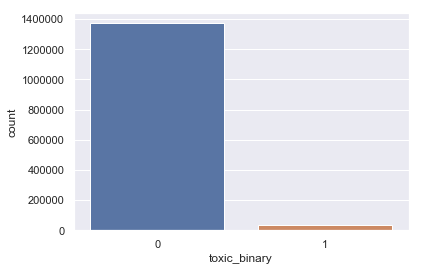

In [26]:
ax = sns.countplot(x="toxic_binary", data=tweets_df) 

### balanced sample tweets 5k toxic, 5k non toxic

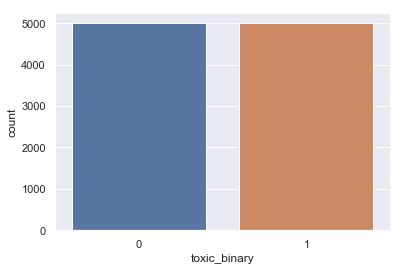

In [27]:
ax = sns.countplot(x="toxic_binary", data=sample_tweets) 

### Correlation heatmap
toxic tweets have longer length, more subjecetive, negative polarity, fewer followers

In [28]:
corr = sample_tweets.corr()['toxicity']
corr = corr[['text_len', 'favourites_count', 'retweet_count', 'followers_count',
                                        'friends_count', 'polarity', 'subjectivity']]
corr = corr.to_frame(name='toxicity')
corr = corr.iloc[corr['toxicity'].abs().argsort()[::-1]]
corr

,toxicity
polarity,-0.471885
subjectivity,0.363176
favourites_count,0.100683
text_len,0.070597
followers_count,-0.067686
retweet_count,-0.018630
friends_count,0.013258


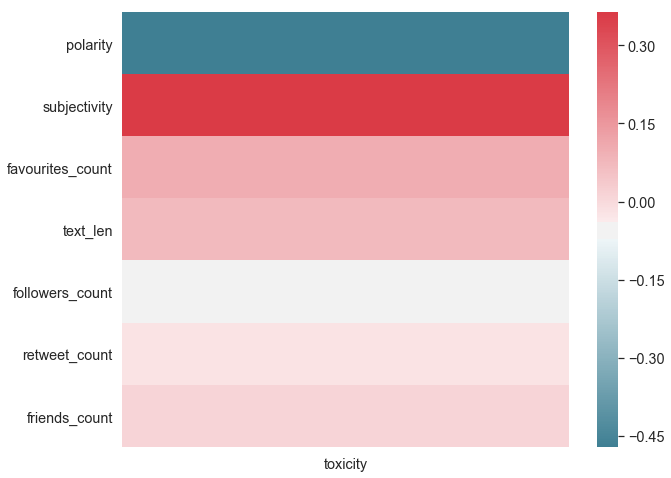

In [31]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# we don't need the correlation between sick and sick 
sns.heatmap(corr, cmap=cmap)  
plt.show()

In [30]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'x-large',
          ""
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


In [32]:
non_toxic = sample_tweets[sample_tweets.toxic_binary == 0]
toxic = sample_tweets[sample_tweets.toxic_binary == 1]

### Distribution of polarity for toxic tweets and non toxic tweets
toxic tweets are more negtive <br>
non toxic tweets have nutrual polarity

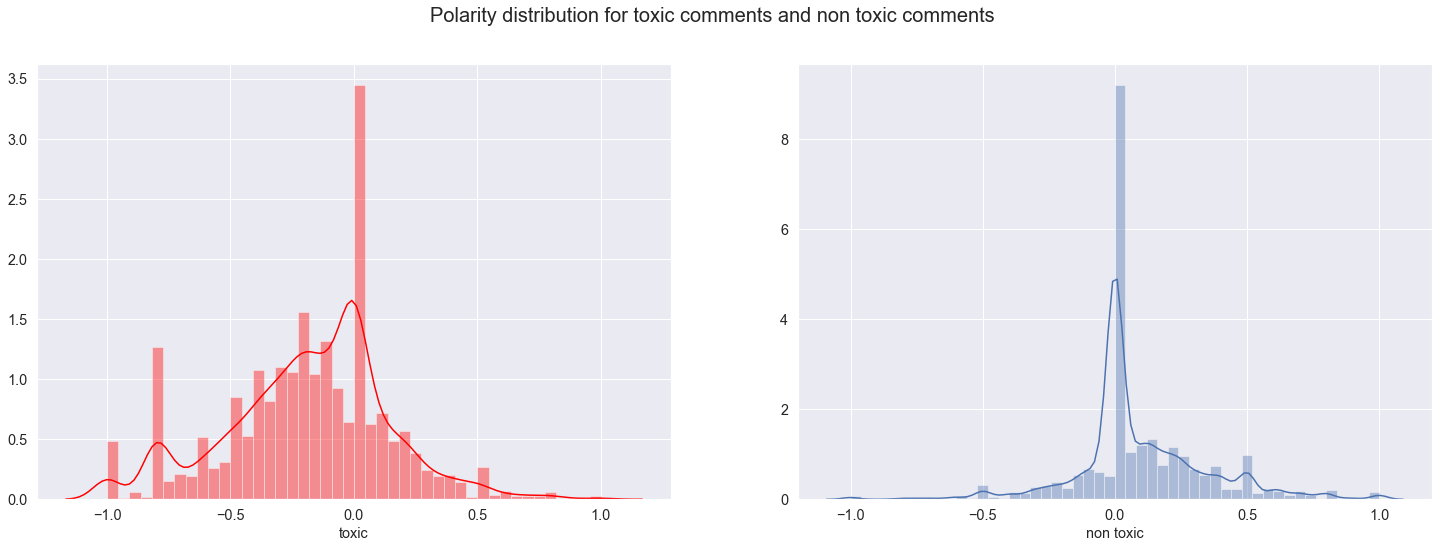

In [33]:
fig, ax =plt.subplots(1,2, figsize = (25, 8))

sns.distplot(toxic['polarity'], ax=ax[0], color="red")
sns.distplot(non_toxic['polarity'], ax=ax[1])

ax[0].set(xlabel = "toxic")
ax[1].set(xlabel = "non toxic")

plt.suptitle("Polarity distribution for toxic comments and non toxic comments", fontsize = 20)
fig.show()

### Distribution of subjectivity for toxic tweets and non toxic tweets
toxic tweets are more subjective <br>
non toxic tweets tends to be more objective

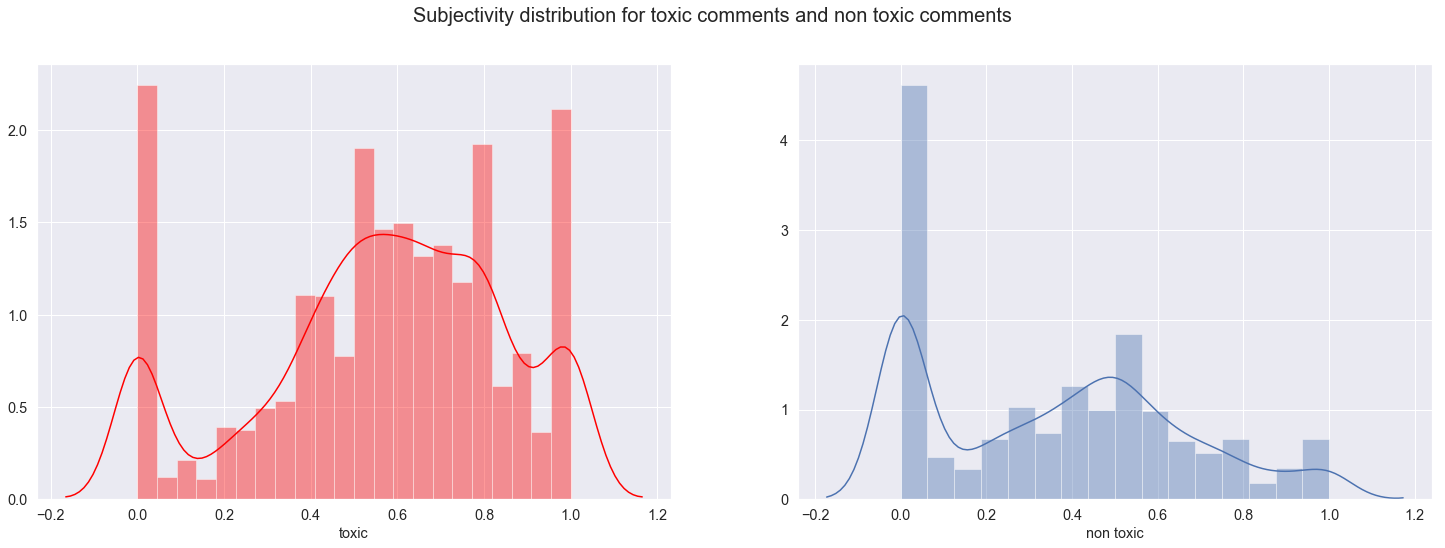

In [34]:
fig, ax =plt.subplots(1,2, figsize = (25, 8))

sns.distplot(toxic['subjectivity'], ax=ax[0], color="red")
sns.distplot(non_toxic['subjectivity'], ax=ax[1])

ax[0].set(xlabel = "toxic")
ax[1].set(xlabel = "non toxic")

plt.suptitle("Subjectivity distribution for toxic comments and non toxic comments", fontsize = 20)
fig.show()

In [35]:
def distribution_plot(df, feature, title, yrange = None, figsize = (25, 8)):
    threshold = df[feature].describe()['75%']
    temp = df[(df[feature].notna()) &( df[feature] <= threshold)]
    toxic = temp[temp.toxic_binary == 1]
    non_toxic = temp[temp.toxic_binary == 0]
    fig, ax =plt.subplots(1,2, figsize = (figsize))
    sns.distplot(toxic[feature], ax=ax[0], color="red")
    sns.distplot(non_toxic[feature], ax=ax[1])
    ax[0].set(xlabel = "toxic")
    ax[1].set(xlabel = "non toxic")
    if yrange != None:
        ax[0].set_ylim(yrange)
        ax[1].set_ylim(yrange) 
    plt.suptitle(title + " distribution for toxic comments and non toxic comments", fontsize = 20)
    fig.show()

In [36]:
non_toxic.head()

,text,verified,text_len,favourites_count,retweet_count,followers_count,friends_count,toxicity,toxic_binary,polarity,subjectivity
2484992,president marie brown (right) delivered 2 boxe...,False,38,2.0,0.0,9.0,10.0,0.004075,0,0.142857,0.267857
535000,miss painting faaaaaace #covid19 #isolation #c...,False,10,3942.0,0.0,294.0,187.0,0.038686,0,0.000000,0.000000
4525588,thank raising cane's providing food evs team! ...,False,14,437.0,1.0,1661.0,1983.0,0.005548,0,0.000000,0.000000
6199352,relationship #covid19 refugees/immigration swe...,True,25,2878.0,14.0,23235.0,2279.0,0.006465,0,0.000000,0.500000
3061284,#il06 town hall tonite hosts physicians two ke...,False,44,3127.0,0.0,1794.0,377.0,0.001858,0,0.223810,0.520476


In [37]:
### Distribution of follower count for toxic tweets and non toxic tweets
sample_tweets.followers_count.describe()

count    1.000000e+04
mean     4.103412e+04
std      4.907630e+05
min      0.000000e+00
25%      1.160000e+02
50%      6.030000e+02
75%      2.904000e+03
max      1.400471e+07
Name: followers_count, dtype: float64

In [38]:
temp = sample_tweets[sample_tweets['followers_count'].notna()]
temp['follower_cat'] = pd.cut(temp['followers_count'], bins = [0, 500, 2000, 1.500293e+07], labels = ['<500', '<2000', '>=2000'])

### Distribution of number of followers for toxic tweets and non toxic tweets
toxic tweets are associated with fewer follower

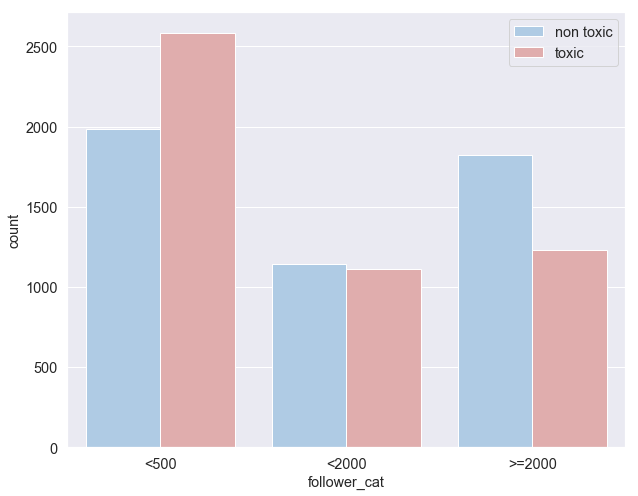

In [57]:
sns.countplot(x="follower_cat", hue="toxic_binary", data=temp,palette= ["#a6cbed",                 "#e8a5a5"])
plt.legend(labels=["non toxic","toxic"])
plt.show()

In [275]:
temp['polarity_cat'] = pd.cut(temp['polarity'], bins = [-1, -0.4,0.4, 1], labels = ['negative', 'neutral', 'positive'])
temp['subjective_cat'] = pd.cut(temp['subjectivity'], bins = [0,0.5, 1], labels = ['objective', 'subjective'])

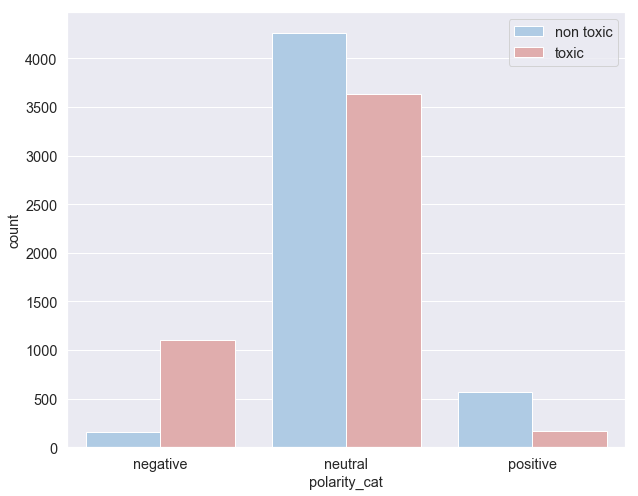

In [273]:
sns.countplot(x="polarity_cat", hue="toxic_binary", data=temp,palette= ["#a6cbed","#e8a5a5"])
plt.legend(labels=["non toxic","toxic"])
plt.show()

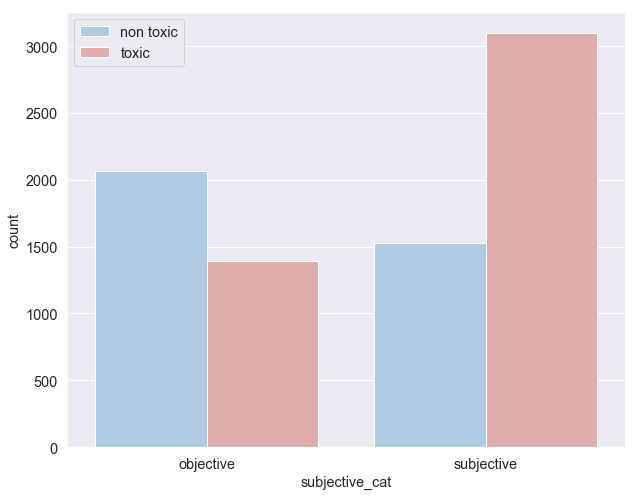

In [276]:
sns.countplot(x="subjective_cat", hue="toxic_binary", data=temp,palette= ["#a6cbed","#e8a5a5"])
plt.legend(labels=["non toxic","toxic"])
plt.show()

### Distribution of number of followers for toxic tweets and non toxic tweets
Verified users are more civic

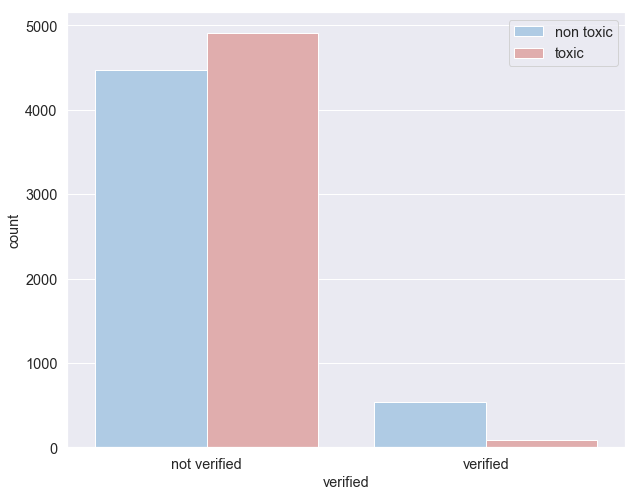

In [267]:
ax = sns.countplot(x="verified", hue="toxic_binary", data=temp,palette= ["#a6cbed", "#e8a5a5"])
plt.legend(labels=["non toxic","toxic"])
ax.set(xticks=range(2), xticklabels=["not verified","verified"])
plt.show()

### Distribution of text length for toxic comments and non toxic comments
Almost identical

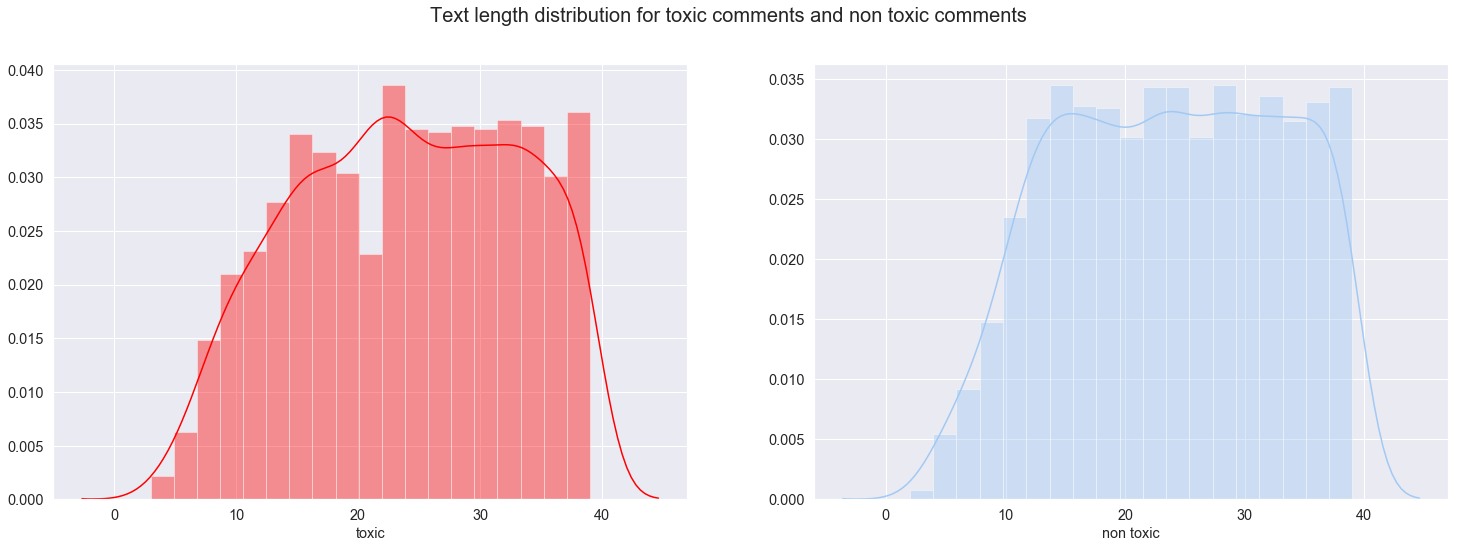

In [59]:
distribution_plot(sample_tweets, "text_len", title = "Text length")

### Distribution of friends count for toxic tweets and non toxic tweets
Almost identical, thus not much difference

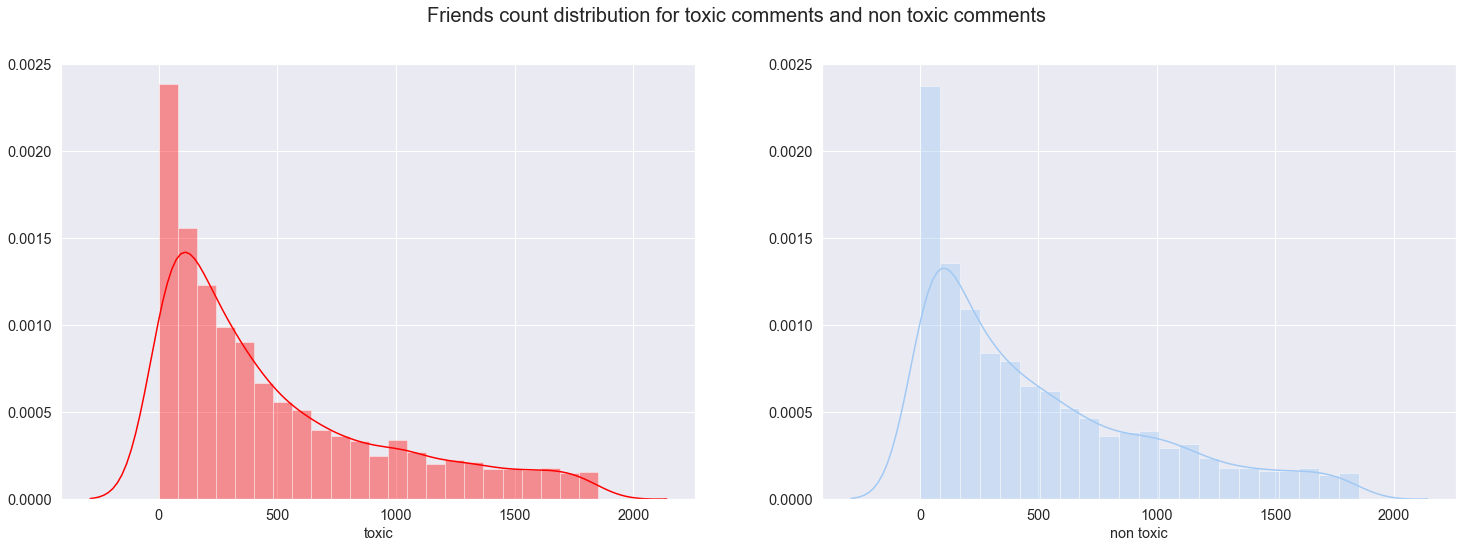

In [62]:
distribution_plot(sample_tweets, "friends_count", title = "Friends count", yrange = (0, 0.0025))

### Distribution of favourites count for toxic tweets and non toxic tweets
Almost identical, thus not much difference

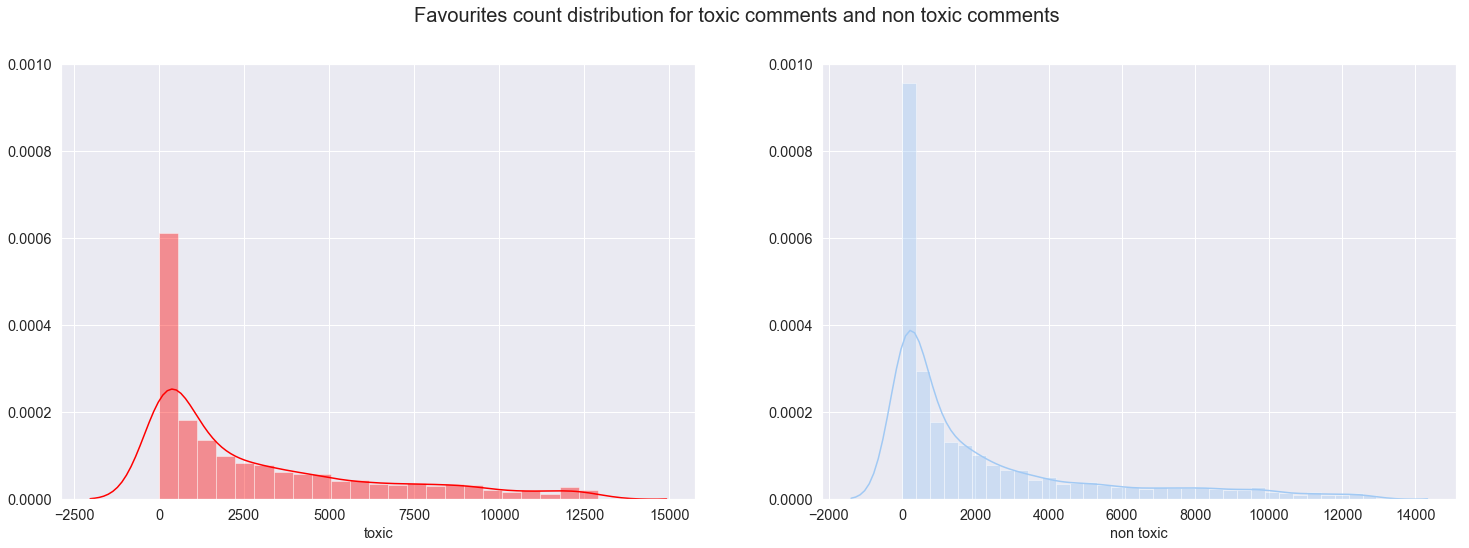

In [64]:
distribution_plot(sample_tweets, "favourites_count", title = "Favourites count", yrange = (0,0.001))

### World Cloud of Top 100 toxic Tweets

In [251]:
### Word Cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random
from PIL import Image
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 60%%, %d%%)" % random.randint(30, 70)
def word_cloud(df, title, mask = None, ls = ['coronavirus',  'amp', 'people',  'covid_19']):
    selected_toxic_df = df
#     selected_toxic_df.text = selected_toxic_df.text.apply(remove_keyword)
    comments = list(selected_toxic_df.text.values)
    random.shuffle(comments)

    STOPWORDS.update(ls)
    text = "".join(comments)
   

    if mask is not None:
        mask_img = np.array(Image.open(mask))
        wordcloud = WordCloud(background_color="black", 
                              stopwords = STOPWORDS,  max_words=600,
                              max_font_size=90, 
                              mask = mask_img).generate(text)
        image_colors = ImageColorGenerator(mask_img)
        plt.figure(figsize=(20, 20))
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    else:
        plt.figure(figsize=(15, 15))
        wordcloud = WordCloud(background_color="black", 
                              stopwords = STOPWORDS,  max_words=800,
                              max_font_size=90, random_state=300,).generate(text) 
        plt.imshow(wordcloud.recolor(color_func=red_color_func), interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

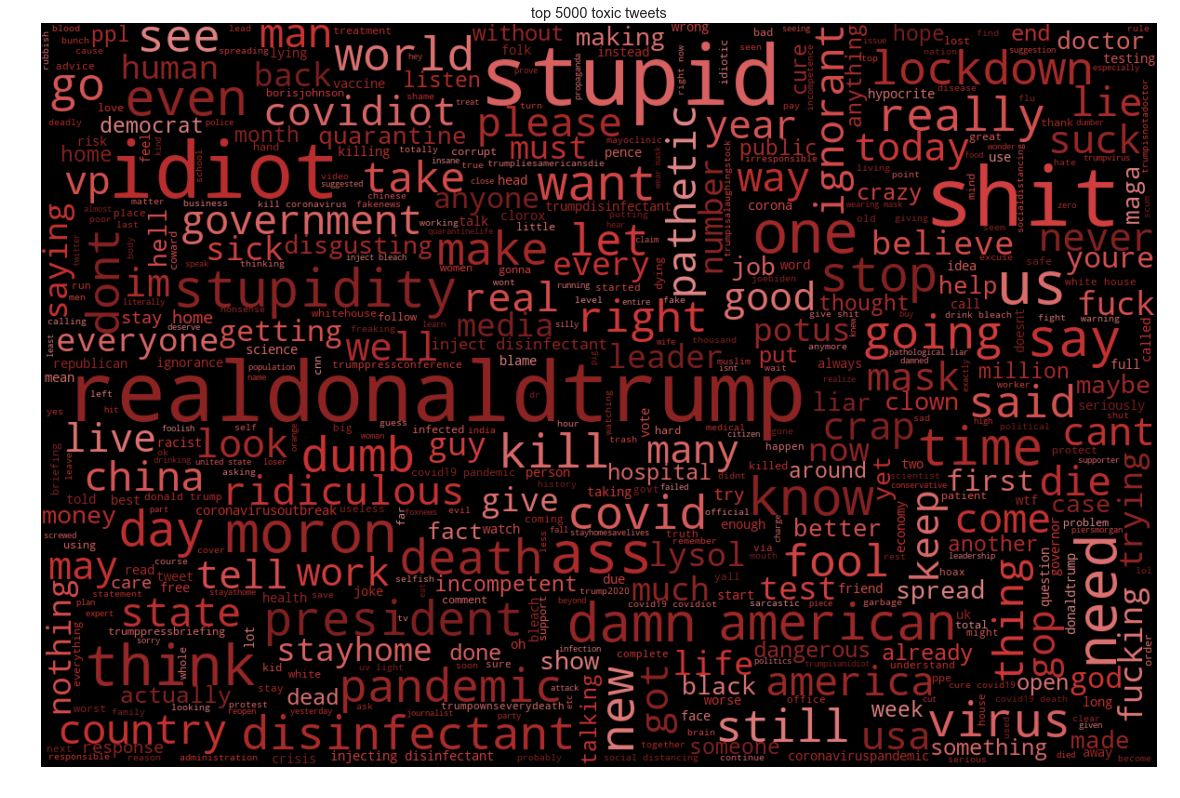

In [248]:
word_cloud(top5000_toxic, "top 5000 toxic tweets", "cov19.jpg")

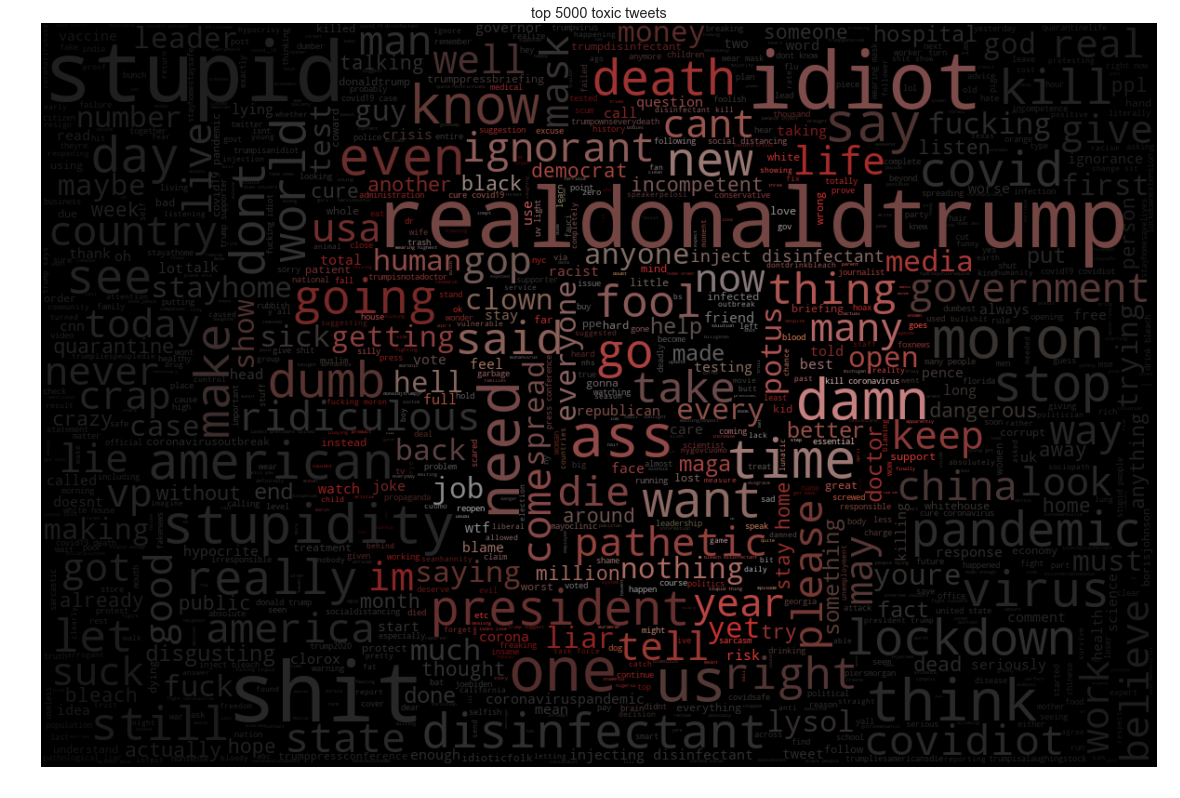

In [239]:
word_cloud(top5000_toxic, "top 5000 toxic tweets", "cov19.jpg")

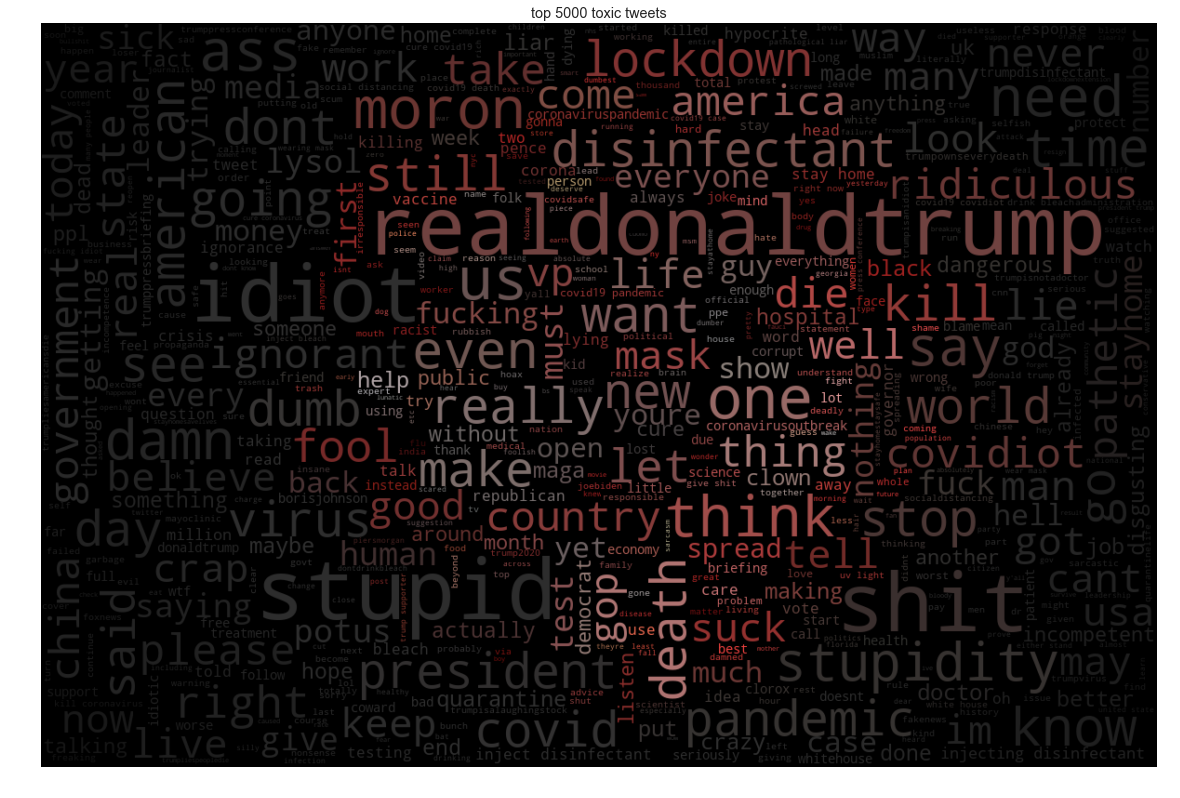

In [252]:
word_cloud(top5000_toxic, "top 5000 toxic tweets", "cov19.jpg")

### Top 10 tweets with highest toxicity score

In [260]:
for each in toxic.sort_values(by = "toxicity", ascending = False).head(10).text:
    print(each)
    print()

"do not" inject disinfectant. #coronavirus #trumpvirus #impeachedtrump #worstpresidentever #donaldtrump #narcissist #misogynist #prejudice #ignorance #bigotry #scammer #donthecon #fakepresident #trash #hatefulman #moron #hypocrite #lockhimup #viral #videooftheday

#drdrew, #droz, #drphil blasted #covid19 comments. #coronavirus #trumpvirus #impeachedtrump #worstpresidentever #donaldtrump #narcissist #misogynist #prejudice #ignorance #bigotry #scammer #donthecon #fakepresident #trash #hatefulman #moron #viral #videooftheday #clowns

donald trump freaking idiot. #covid19

#trumppressbriefing #stupidity #covid19 #trumpdumbestpresidentever try stupid ass lysol &amp; clorox bleach experiment wife, kids get back us. he's fucking idiot. levels stupidity want shut fuck &amp; stop killing us.

#donaldtrump supporters blood hands. #coronavirus #trumpvirus #impeachedtrump #worstpresidentever #narcissist #misogynist #prejudice #ignorance #bigotry #scammer #donthecon #conartist #clown #fakepresident

### Top 10 tweets with highest toxicity score

In [261]:
for each in non_toxic.sort_values(by = "toxicity").head(10).text:
    print(each)
    print()

73) log #covid19 #coronavirus #covidsymptoms day 22: mon 04/27 symptoms: -mild congestion -mild sore throat -mild cough -diminished taste -diminished smell -phantom smells (smoke,bleach) -mild fatigue symptoms gone: -chills -body aches -headache 3wks, finally arrived

insightful @nytimes piece colleague @jtrothwell #gallup #covid19

butts. #hiking #booty #fit #fitness #fitfam #muscle #outdoors #covid #coronavirus #bodybuilding #bodypositivity @ ely's peak

@gileadsciences shares rise @realdonaldtrump praises potential #coronavirus drug @ft @wsjhealth @wsjbusiness @cdcgov @hhsgov @amermedicalassn @reuters @business @washingtonpost @nytimes @latimes @chicagotribune @ap @bbc @cnbc @cnn @msnbc @thehill

thread: diy #ppe-to-#sanitary_pads :) #covid19 #fighteverycrisis @who @malala @billgates @people_comms @somedocs @droz #tweetiatrician #womeninmedicine #nursetwitter @sdgaction @undp @un_news_centre @un_women @un_csw @refugees @hrw #news @ft @bbcnews @nytimes @latimes @newshour

we're near 

In [322]:
from sklearn.feature_extraction.text import TfidfVectorizer
nested = list(toxic.text.str.split())
bagOfWordToxic = " ".join([tweet for tweets in nested for tweet in tweets])

nested = list(non_toxic.text.str.split())
bagOfWordNonToxic = " ".join([tweet for tweets in nested for tweet in tweets])

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([bagOfWordToxic, bagOfWordNonToxic])

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tf_idf_df= pd.DataFrame(denselist, columns=feature_names, index = ['toxic', 'non toxic'])
tf_idf_df = tf_idf_df.T

### Top words from tf-idf (PUT INTO REPORT AS A TABLE)
Put this into paper: a table for toxic vs non toxic keywords

In [323]:
tf_idf_df['diff'] = tf_idf_df['toxic'] - tf_idf_df['non toxic']
top20 = tf_idf_df[tf_idf_df['diff'] > 0].sort_values(by = 'diff', ascending = False).head(20)

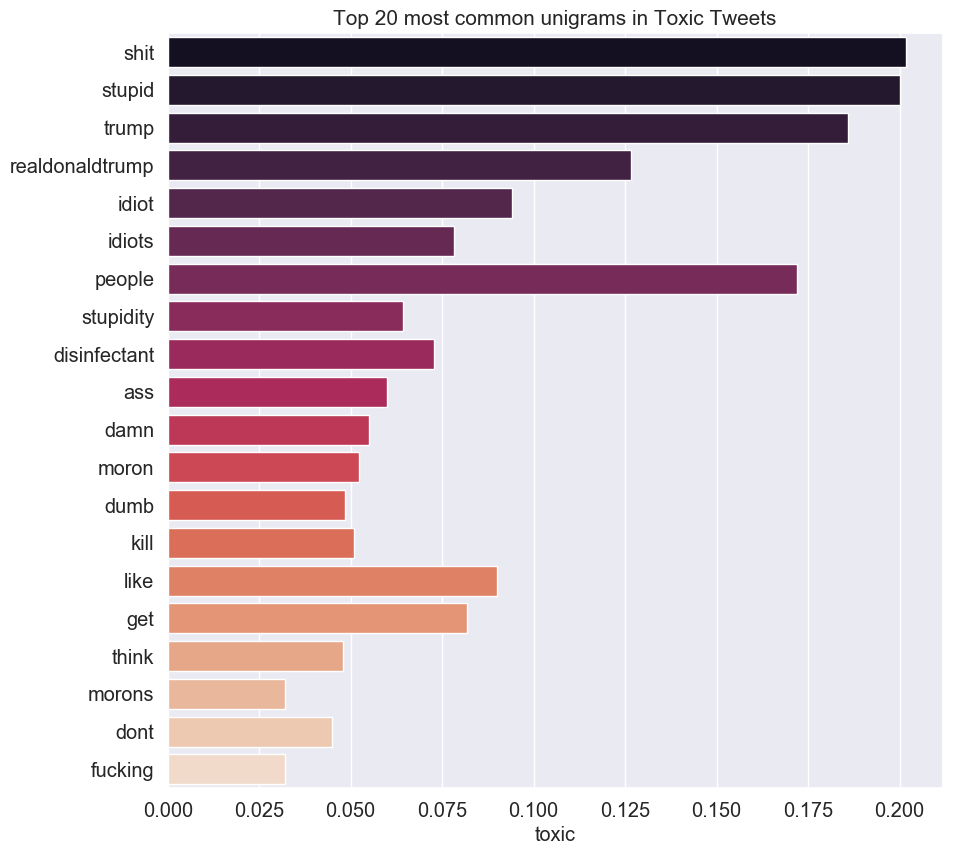

In [348]:
plt.figure( figsize=(10, 10), dpi=100)
plt.tight_layout()

ax = sns.barplot(y=top20.index, x=top20['toxic'], palette = "rocket")

# for i in range(2):
#     axes[i].spines['right'].set_visible(False)
#     axes[i].set_xlabel('')
#     axes[i].set_ylabel('')
#     axes[i].tick_params(axis='x', labelsize=13)
#     axes[i].tick_params(axis='y', labelsize=13)

ax.set_title(f'Top {20} most common unigrams in Toxic Tweets', fontsize=15)
plt.show()

### Bigram

In [310]:
vectorizer = TfidfVectorizer(ngram_range=(2,2))
vectors = vectorizer.fit_transform([bagOfWordToxic, bagOfWordNonToxic])

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tf_idf_df= pd.DataFrame(denselist, columns=feature_names, index = ['toxic', 'non toxic'])
tf_idf_df = tf_idf_df.T

In [317]:
tf_idf_df['diff'] = tf_idf_df['toxic'] - tf_idf_df['non toxic']
tf_idf_df[tf_idf_df['diff'] > 0].sort_values(by = 'diff', ascending = False).head(20)

,toxic,non toxic,diff
covid19 coronavirus,0.375808,0.280407,0.095400
covid19 realdonaldtrump,0.076409,0.005903,0.070506
give shit,0.067941,0.000000,0.067941
injecting disinfectant,0.068612,0.005903,0.062709
donald trump,0.070172,0.008855,0.061317
inject disinfectant,0.068612,0.008855,0.059757
white house,0.060815,0.004427,0.056388
covid19 trump,0.062375,0.007379,0.054996
shit covid19,0.054791,0.000000,0.054791
pathological liar,0.054791,0.000000,0.054791


### Tri gram and Teragram relates to keyword gay 
Possible reason: https://www.nbcnews.com/health/health-care/gay-men-still-unable-donate-blood-plasma-despite-new-fda-n1182926

In [321]:
vectorizer = TfidfVectorizer(ngram_range=(3,4))
vectors = vectorizer.fit_transform([bagOfWordToxic, bagOfWordNonToxic])

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tf_idf_df= pd.DataFrame(denselist, columns=feature_names, index = ['toxic', 'non toxic'])
tf_idf_df = tf_idf_df.T
tf_idf_df['diff'] = tf_idf_df['toxic'] - tf_idf_df['non toxic']
tf_idf_df[tf_idf_df['diff'] > 0].sort_values(by = 'diff', ascending = False).head(20)

,toxic,non toxic,diff
liar corrupt criminal,0.026936,0.0,0.026936
pathological liar corrupt,0.026936,0.0,0.026936
liar corrupt criminal donaldtrump,0.026936,0.0,0.026936
pathological liar corrupt criminal,0.026936,0.0,0.026936
corrupt criminal donaldtrump,0.026936,0.0,0.026936
quedateencasa coronavirus saludable traveller,0.024691,0.0,0.024691
hombres mujeres gay gayboy,0.024691,0.0,0.024691
saludable traveller influencer,0.024691,0.0,0.024691
saludable traveller influencer hombres,0.024691,0.0,0.024691
traveller influencer hombres mujeres,0.024691,0.0,0.024691
